# Explore Datasets
Download, load and inspect the `CIFAR10`, `CIFAR100`, `MNIST`, ... datasets used in this project.

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# enable us to import from parent directory
import sys
sys.path.append('../')

from utils import download_datasets, get_dataloader, \
    get_label_map, min_max_norm_image

%load_ext autoreload
%autoreload 2

DATA_ROOT = '../../data/'

In [2]:
# Initialize config dict
config = {
    'batch_size': 24,
    'image_size': 32,
    'model': 'ddpm'
}
device = 'cuda' if torch.cuda.is_available() else 'cpu'

Download the datasets used in this project

In [3]:
# download_datasets(data_root=DATA_ROOT)

Define a function to display a batch of images.

In [4]:
def display_image_batch(loader, label_map=None, image_name=None):
    # Get a batch of images
    image_batch, y_batch = next(iter(loader))
    
    print(f'(min: {image_batch.min()}, max: {image_batch.max()}, size: {image_batch.shape[2]})')
    
    # scale back to [0, 1] for displaying
    # image_batch = (image_batch + 1) * 0.5
    image_batch = min_max_norm_image(image_batch)

    # transform classes to labels
    if label_map:
        labels = [label_map[y] for y in y_batch]
    else:
        labels = y_batch.numpy()

    # Display the images in the batch
    n = image_batch.shape[0]
    n_rows = 3
    n_cols = int(n/n_rows)
    f, ax = plt.subplots(n_rows, n_cols, figsize=(24, 9))
    for i in range(n):
        i_, j_ = int(i/n_cols), i%n_cols
        ax[i_, j_].imshow(np.moveaxis(image_batch[i].numpy(), 0, -1), cmap='gray')
        ax[i_, j_].axis('off')
        ax[i_, j_].set_title(labels[i], fontsize=16)
    if image_name:
        plt.savefig(f'../results/images/{image_name}.png', bbox_inches='tight')
    plt.show()

Load and inspect the `CIFAR10` dataset

(min: -1.0, max: 1.0, size: 32)


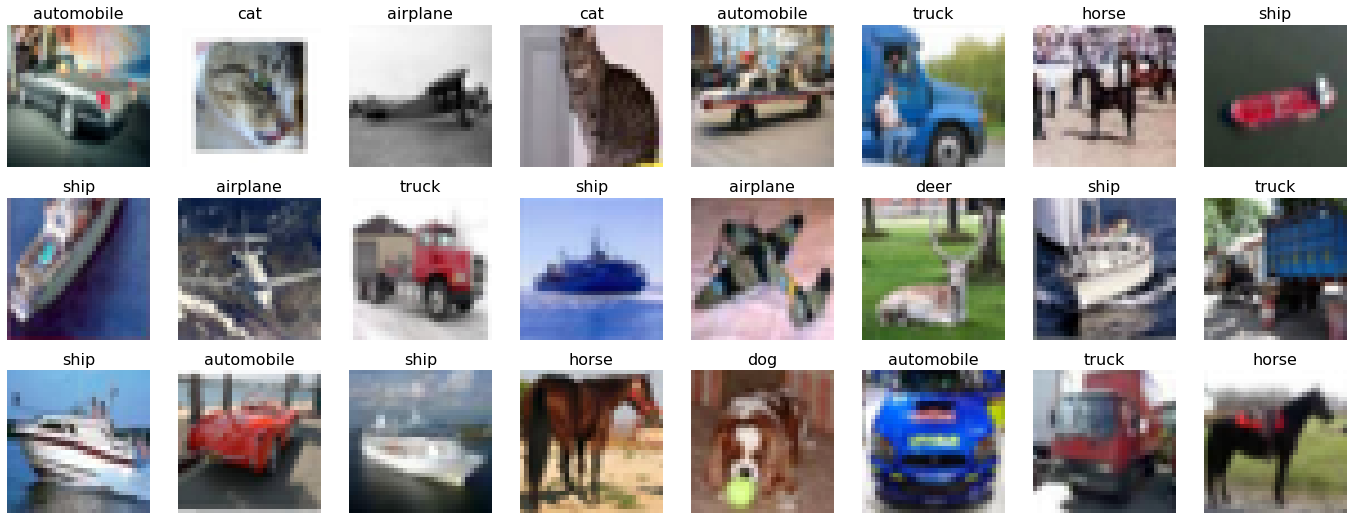

In [5]:
# Adapt config to cifar10
config['dataset'] = 'cifar10'

# Get DataLoader and label map
loader, _ = get_dataloader(config, device=device, data_root=DATA_ROOT)
label_map = get_label_map(config['dataset'])
display_image_batch(loader, label_map, config['dataset'])

Load and inspect the `MNIST` dataset

/zhome/d1/d/127408/venv/lib64/python3.6/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


(min: -1.0, max: 1.0, size: 32)


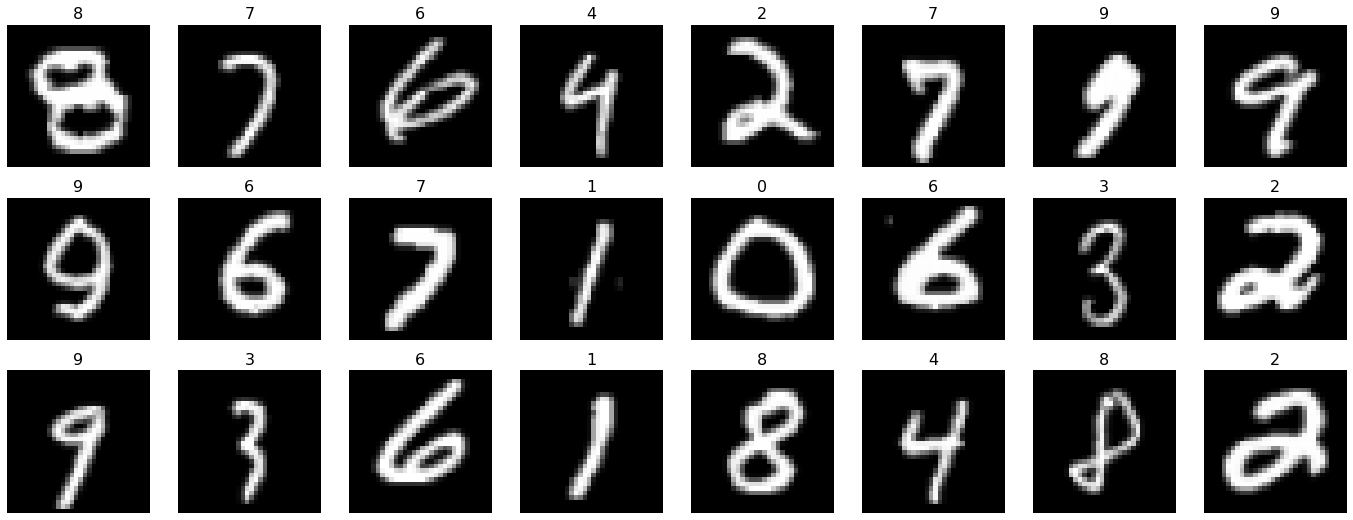

In [6]:
# Adapt config to mnist
config['dataset'] = 'mnist'

# Get DataLoader and visualize batch
loader, _ = get_dataloader(config, device=device, data_root=DATA_ROOT)
display_image_batch(loader, None, config['dataset'])

Load and inspect the `CelebA` (256 x 256)

(min: -1.0, max: 1.0, size: 256)


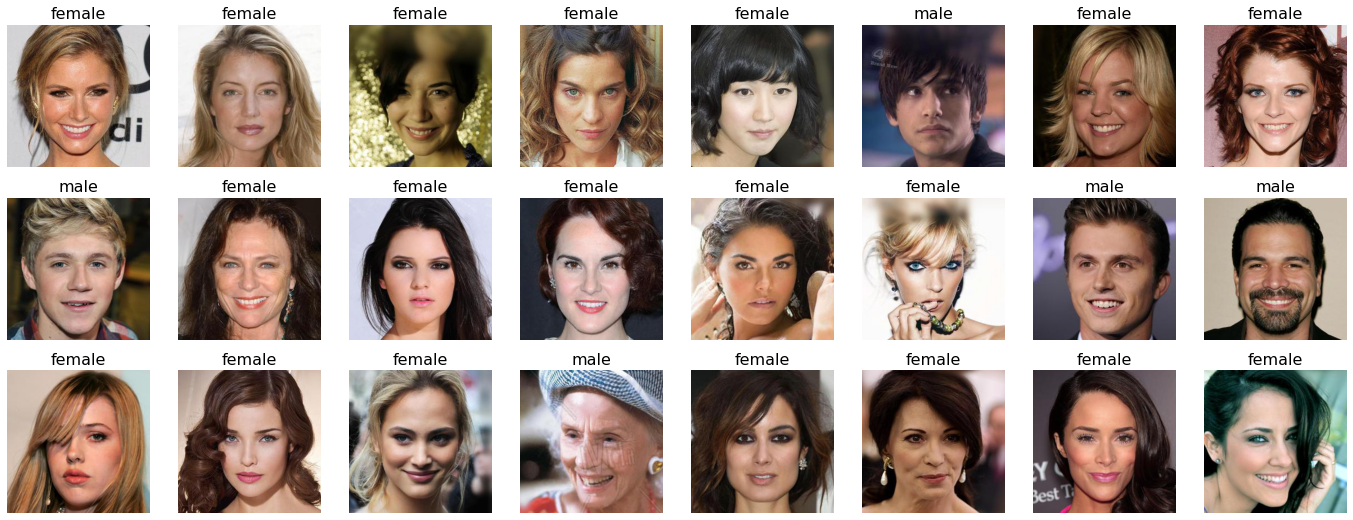

In [7]:
# adapt config to celeba_hq
config['dataset'] = 'celeba_hq'
config['image_size'] = 256

# Get DataLoader and visualize batch
loader, _ = get_dataloader(config, device, True, DATA_ROOT)
label_map = get_label_map(config['dataset'])
display_image_batch(loader, label_map, config['dataset'])

Load and inspect the `CelebA` (64 x 64)

(min: -1.0, max: 1.0, size: 64)


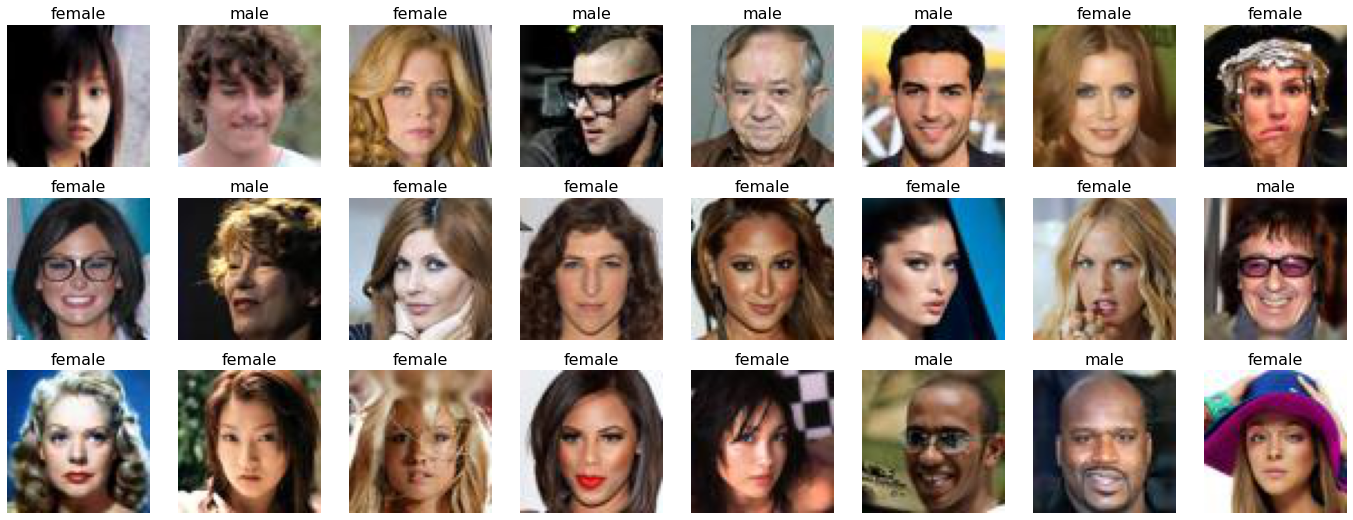

In [8]:
# adapt config to celeba
config['dataset'] = 'celeba'
config['image_size'] = 64

# Get DataLoader and visualize batch
loader, _ = get_dataloader(config, device, True, DATA_ROOT)
label_map = get_label_map(config['dataset'])
display_image_batch(loader, label_map, config['dataset'])